In [1]:
import pandas as pd
import duckdb 
import geopandas as gpd
import geoparquet_io as gpio

In [2]:
liste_ocsge = pd.read_json('dep_dispo_2026_01_07.json')

In [10]:
con = duckdb.connect()

In [11]:
con.execute('load spatial;')

In [16]:
dep = gpd.read_file("dep_francemetro_2025.gpkg")

In [17]:
dep = gpd.read_file('ADE_4-0_GPKG_LAMB93_FXX-ED2025-12-05.gpkg', layer= 'departement')

In [18]:
dep.rename(columns={'code_insee':'code'}, inplace=True)

In [ ]:
for index, row in dep.iterrows():
    print(index)
    year = str(liste_ocsge.loc[liste_ocsge.codgeo == row.code,'year'].iloc[0])
    rowdep = gpd.GeoDataFrame(geometry=[row.geometry], crs='EPSG:2154')
    rowdep.to_parquet('rowdep.parquet') 

    con.sql(
    """COPY(
    SELECT
        a.code_cs, a.code_us, a.millesime, """ + str(row.code) + """ code_insee,
        a.geometry AS geometry
    FROM read_parquet('files_ocsge/OCS-GE_2-0__GPKG_LAMB93_D0"""  + str(row.code) + '_' +  year + """-01-01.parquet') a
    JOIN read_parquet('rowdep.parquet') as b
    ON ST_Within(a.geometry, b.geometry)
    UNION
    SELECT
        a.code_cs, a.code_us, a.millesime, """ + str(row.code) + """ code_insee,
        ST_Intersection(a.geometry, b.geometry) AS geometry
    FROM read_parquet('files_ocsge/OCS-GE_2-0__GPKG_LAMB93_D0"""  + str(row.code) + '_' +  year + """-01-01.parquet') a
    JOIN read_parquet('rowdep.parquet') as b
    ON ST_Intersects(a.geometry, b.geometry)   
    WHERE NOT ST_Within(a.geometry, b.geometry)
    )
    TO 'clipped_files_ocsge/OCS-GE_2-0__GPKG_LAMB93_D0"""  + str(row.code) + '_' +  year + """-01-01.parquet'
    (FORMAT PARQUET);""")
    
    gpio.read('clipped_files_ocsge/OCS-GE_2-0__GPKG_LAMB93_D0'  + str(row.code) + '_' +  year + '-01-01.parquet') \
    .add_bbox() \
    .sort_hilbert() \
    .write('clipped_files_ocsge/OCS-GE_2-0__GPKG_LAMB93_D0'  + str(row.code) + '_' +  year + '-01-01.parquet', compression='ZSTD')

0


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

1


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

2


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

3


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

4


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

5


In [21]:
toto = gpd.read_parquet('files_ocsge/OCS-GE_2-0__GPKG_LAMB93_D0'  + str(row.code) + '_' +  year + '-01-01.parquet')

<Axes: >

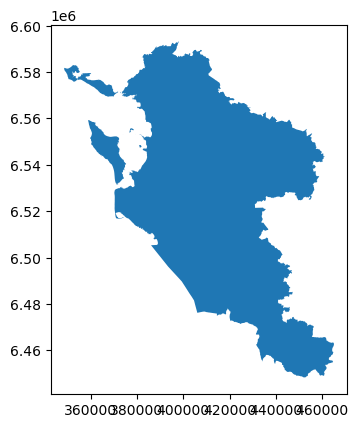

In [24]:
rowdep.plot()

In [150]:
"""COPY(
    SELECT
        a.code_cs, a.code_us, a.millesime, """ + str(row.code) + """ code_insee
        ST_Intersection(a.geometry, b.geometry) AS geometry
    FROM read_parquet('files_ocsge/OCS-GE_2-0__GPKG_LAMB93_D0"""  + str(row.code) + '_' +  year + """-01-01.parquet') a
    JOIN read_parquet('dep.parquet') as b
    ON ST_Intersects(a.geometry, b.geometry)
    )
    TO clipped_files_ocsge/OCS-GE_2-0__GPKG_LAMB93_D0"""  + str(row.code) + '_' +  year + """-01-01.parquet'
    (FORMAT PARQUET);"""

"COPY(\n    SELECT\n        a.code_cs, a.code_us, a.millesime, 88 code_insee\n        ST_Intersection(a.geometry, b.geometry) AS geometry\n    FROM read_parquet('files_ocsge/OCS-GE_2-0__GPKG_LAMB93_D088_2023-01-01.parquet') a\n    JOIN read_parquet('dep.parquet') as b\n    ON ST_Intersects(a.geometry, b.geometry)\n    )\n    TO clipped_files_ocsge/OCS-GE_2-0__GPKG_LAMB93_D088_2023-01-01.parquet'\n    (FORMAT PARQUET);"

In [ ]:
code_cs	code_us	millesime codgeo

In [118]:
for index, row in dep[12:13].iterrows():
    print(index)
    year = str(liste_ocsge.loc[liste_ocsge.codgeo == row.code,'year'].iloc[0])
    ocs = gpd.read_parquet('files_ocsge/OCS-GE_2-0__GPKG_LAMB93_D0' + str(row.code) + '_' +  year + '-01-01.parquet')

12


In [141]:
'files_ocsge/OCS-GE_2-0__GPKG_LAMB93_D0' + str(row.code) + '_' +  year + '-01-01.parquet'

'files_ocsge/OCS-GE_2-0__GPKG_LAMB93_D088_2023-01-01.parquet'

In [126]:
clipped = gpd.clip(ocs, gpd.GeoDataFrame(geometry=[row.geometry], crs='EPSG:2154'))

C:\Users\francois.semecurbe\AppData\Local\Temp\ipykernel_20908\3744758381.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:2154
Right CRS: None

  clipped = gpd.clip(ocs, gpd.GeoDataFrame(geometry=[row.geometry]))


In [148]:
clipped

,id,code_cs,code_us,millesime,source,ossature,id_origine,code_or,geometry
258222,OCSGE0000000010061705895,CS1.1.1.2,US4.1.1,2023,calcul,0,NC,NC,"POLYGON ((959909.3 6759629, 959903.069 6759626..."
258224,OCSGE0000000010061706168,CS1.1.1.1,US1.1,2023,calcul,0,NC,NC,"POLYGON ((959969.68 6759763.17, 959958.84 6759..."
258223,OCSGE0000000010061706923,CS2.2.1,US1.1,2023,calcul,0,NC,NC,"POLYGON ((959681 6759963.3, 959683.56 6759963...."
258218,OCSGE0000000010061705264,CS2.1.1.2,US1.2,2023,calcul,0,NC,NC,"POLYGON ((959823.91 6760448.28, 959826.96 6760..."
258126,OCSGE0000000010061705196,CS2.2.1,US1.1,2023,calcul,0,NC,NC,"POLYGON ((959802.44 6760492.73, 959798.54 6760..."
...,...,...,...,...,...,...,...,...,...
123127,OCSGE0000000010061527131,CS2.1.1.1,US1.2,2023,calcul,0,NC,NC,"POLYGON ((1004111.48 6831452.48, 1004094.23 68..."
122794,OCSGE0000000010061527441,CS2.1.1.1,US5,2023,calcul,0,NC,NC,"POLYGON ((1002484.2 6831429.2, 1002479.78 6831..."
122793,OCSGE0000000010061518325,CS2.1.1.1,US1.2,2023,calcul,0,NC,NC,"POLYGON ((1002510.95 6831467.47, 1002515.8 683..."
122795,OCSGE0000000010061518327,CS1.1.1.1,US5,2023,calcul,0,NC,NC,"POLYGON ((1002335.32 6831455.32, 1002335.87 68..."


In [128]:
ocs.area.sum(), row.geometry.area

(5891730406.168497, 5891712993.235006)

In [132]:
rowdep = gpd.GeoDataFrame(geometry=[row.geometry], crs='EPSG:2154')

In [143]:
rowdep.to_parquet('dep.parquet')

In [144]:
con.sql(
    """COPY(
    SELECT
        a.* EXCLUDE (geometry),
        ST_Intersection(a.geometry, b.geometry) AS geometry
    FROM read_parquet('files_ocsge/OCS-GE_2-0__GPKG_LAMB93_D088_2023-01-01.parquet') a
    JOIN read_parquet('dep.parquet') as b
    ON ST_Intersects(a.geometry, b.geometry)
)
TO 'clipped.geoparquet'
(FORMAT PARQUET);""")

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

In [167]:
toto = gpd.read_parquet('clipped_files_ocsge/OCS-GE_2-0__GPKG_LAMB93_D088_2023-01-01.parquet')

In [169]:
toto.area.sum(), rowdep.area.sum()

C:\Users\francois.semecurbe\AppData\Local\Temp\ipykernel_20908\2388067145.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  toto.area.sum(), rowdep.area.sum()


(5891710473.769086, 5891712993.235006)

In [170]:
toto.head()

,code_cs,code_us,millesime,code_insee,geometry
0,CS1.1.1.2,US4.1.1,2023,88,"MULTIPOLYGON (((965908.06 6784851.94, 965906.6..."
1,CS2.1.1.2,US1.2,2023,88,"MULTIPOLYGON (((968829.92 6785699.53, 968831 6..."
2,CS1.1.1.1,US5,2023,88,"MULTIPOLYGON (((968007.23 6784432.09, 968013.1..."
3,CS1.1.1.2,US4.3,2023,88,"MULTIPOLYGON (((967823.8 6784151, 967830.5 678..."
4,CS1.1.1.1,US5,2023,88,"MULTIPOLYGON (((968057.85 6783677.08, 968057.3..."


<Axes: >

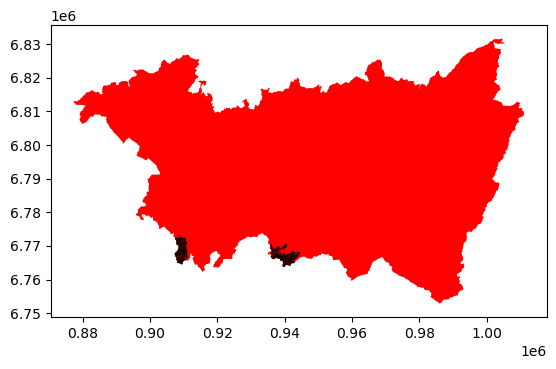

In [125]:
ax = ocs[1:1000].plot(color='black', zorder=2)
gpd.GeoDataFrame(geometry=[row.geometry]).plot(ax=ax, zorder=1, color='red')

In [85]:
code = '13'
year = str(liste_ocsge.loc[liste_ocsge.codgeo == code,'year'].iloc[0])
ocs13 = gpd.read_parquet('files_ocsge/OCS-GE_2-0__GPKG_LAMB93_D0' + code + '_' +  year + '-01-01.parquet')

In [83]:
code = '83'
year = str(liste_ocsge.loc[liste_ocsge.codgeo == code,'year'].iloc[0])
ocs83 = gpd.read_parquet('files_ocsge/OCS-GE_2-0__GPKG_LAMB93_D0' + code + '_' +  year + '-01-01.parquet')

In [88]:
test = ocs13.sjoin(ocs83, how="inner" )

<Axes: >

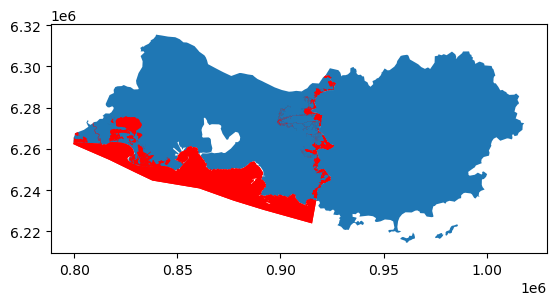

In [97]:
ax = test.plot(color='red', zorder=2)
dep[dep.code.isin(['13', '83'])].plot(ax=ax, zorder=1)



In [13]:
con.execute("LOAD spatial;")

In [16]:
con.sql("create table dep as SELECT * FROM st_read(dep_francemetro_2025.gpkg)")